# STA 141B Project 3



## Lahman's Baseball Database

In this assignment, you'll use SQL queries and __pandas__ to explore data in [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), which contains "complete batting and pitching statistics from 1871 to 2018, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."

You can download the database in SQLite format [HERE](https://anson.ucdavis.edu/~nulle/baseball.sqlite).

Documentation for the database, including a description of all tables, is in the `README.md` file included in this repository.

__Exercise 1.1.__ 

1. From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

2. Is there any general trend in payrolls over this time period?

3. There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

4. How do the top 5 teams compare to other teams?

In [1]:
import sqlite3 as sql
import pandas as pd
baseball = sql.connect("baseball.sqlite")

In [8]:
pd.read_sql("SELECT yearID, COUNT(*) FROM Salaries GROUP BY yearID",baseball)

,yearID,COUNT(*)
0,1985,550
1,1986,738
2,1987,627
3,1988,663
4,1989,711
5,1990,867
6,1991,685
7,1992,769
8,1993,923
9,1994,884


### 1.1.1 Top 5 teams with highest payrolls between 2006 and 2016 

In [589]:
# I first sum the salaries for each team, between the years of 2006 and 2016. 
# Then I use the teams table to merge the actual name of the team for each team id
# Finally, I find the max salary year for each team and then return the teams with the highest salaries between the 
# years 2006 and 2016

pd.read_sql("""
     SELECT name, MAX(payroll) AS highest_payroll, teamID FROM
    (SELECT s.*, t.name FROM
    (SELECT sum(salary) AS payroll, teamID, yearID FROM Salaries GROUP BY teamID, 
     yearID HAVING yearID BETWEEN 2006 and 2016 ORDER by payroll) as s
     LEFT JOIN
     Teams AS t
     ON s.teamID = t.teamID AND s.yearID = t.yearID) 
    GROUP BY teamID ORDER by highest_payroll DESC
    LIMIT 5;
""", baseball)

,name,highest_payroll,teamID
0,New York Yankees,231978886,NYA
1,Los Angeles Dodgers,223362196,LAN
2,Detroit Tigers,194876481,DET
3,Boston Red Sox,188545761,BOS
4,Philadelphia Phillies,180944967,PHI


###### The 5 teams with the highest payroll from the years 2006 to 2016 are the New York Yankees, Los Angeles Dodgers, Detroit Tigers, Boston Red Sox and the Philadelphia Phillies

### 1.1.2 - 1.1.3 Trends of the payrolls from 2006 to 2016

In [590]:
# Get the payroll for each of the top teams found in part one for each year from 2006 to 2016
my_df = pd.read_sql("""
     SELECT * FROM
    (SELECT t.name, s.* FROM
    (SELECT sum(salary) AS payroll, teamID, yearID FROM Salaries GROUP BY teamID, 
     yearID HAVING yearID BETWEEN 2006 and 2016 ORDER by payroll) as s
     LEFT JOIN
     Teams AS t
     ON s.teamID = t.teamID AND s.yearID = t.yearID) 
     WHERE teamID = 'NYA' OR teamID = 'LAN' OR teamID = 'DET' OR teamID = 'BOS' OR teamID = 'PHI' 
""", baseball)

my_df[0:10]

,name,payroll,teamID,yearID
0,Philadelphia Phillies,58980000,PHI,2016
1,Detroit Tigers,82612866,DET,2006
2,Philadelphia Phillies,88273333,PHI,2006
3,Philadelphia Phillies,89428213,PHI,2007
4,Detroit Tigers,94800369,DET,2007
5,Los Angeles Dodgers,95143575,LAN,2012
6,Los Angeles Dodgers,95358016,LAN,2010
7,Philadelphia Phillies,97879880,PHI,2008
8,Los Angeles Dodgers,98447187,LAN,2006
9,Los Angeles Dodgers,100414592,LAN,2009


[Text(0, 0.5, 'Payroll (billion)'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Payroll of the top 5 teams for each year ranging from 2006 to 2016')]

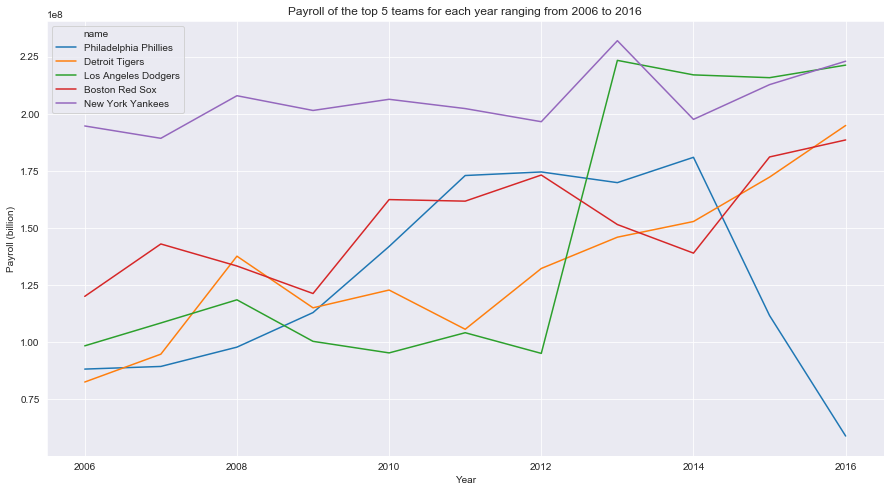

In [591]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 8]
import seaborn as sns

x = sns.lineplot(x = "yearID", y = "payroll", hue = "name", data = my_df)
x.set(title = "Payroll of the top 5 teams for each year ranging from 2006 to 2016", xlabel = "Year", 
      ylabel = "Payroll (billion)")

##### Trends 

The trend I noticed is that between 2006 and 2016, all teams generally had a higher payroll in 2016 than they
they did in 2006, with the exception of the Philidelphia Phillies. Also A trend I noticed is that the Los Angeles Dodgers took a big step in 2013 and increased their payroll significantly.

##### Anomalies
Looking into Philidelpia I found that indeed the did have the 5th lowest payroll in the MLB in 2016. I found that they had a low pay roll as they wanted to rebuild and focus on the young players so they did not pay high salaries to their players. Looking at their rosters I noticed alot of their most expensive players in 2015 either had a decrease in salary or were gone from the roster. For example, the phillies seem to have let Cole Hamels go who they paid 25 million in 2015 and like Cole Hamels who did not play that season went from being paid 24.5 million in 2015 to 7 million in 2016. 

After researching the Dodgers high payroll came as shocking as this was the first time in 16 years  that a team surpasssed the Yankees in payroll. Furthermore, I found Dodgers had increased salaries for some of their player, but mainly they signed a lot of good players who they had to pay alot to get. For example they signed players like Matt Kemp, Carl Crawford and Adrian Gonzalez and each of them got paid more than 20 million. Unforunately, in 2013 this did not completely pay off as though they made it to the world series they were unable to win the championship.

##### Sources
https://www.nbcsports.com/philadelphia/philadelphia-phillies/phillies-shrunken-payroll-byproduct-rebuild
https://legacy.baseballprospectus.com/compensation/index.php?team=PHI&cyear=2016 
https://www.sbnation.com/mlb/2014/3/25/5548060/mlb-payroll-2014-dodgers-yankees

### 1.1.4 How other teams compare to the top 5 teams 

In [592]:
# Getting average payroll for each team from the years 2006 to 2016
my_df = pd.read_sql("""
     SELECT t.name, s.* FROM
    (SELECT sum(salary) AS payroll, teamID, yearID FROM Salaries GROUP BY teamID, 
     yearID HAVING yearID BETWEEN 2006 and 2016 ORDER by payroll) as s
     LEFT JOIN
     Teams AS t
     ON s.teamID = t.teamID AND s.yearID = t.yearID
""", baseball)

# Subsetting data to compare top 5 teamns and the other teams 
top_df = my_df[my_df["teamID"].str.contains("NYA|DET|PHI|BOS|LAN")]
others_df = my_df[~my_df["teamID"].str.contains("NYA|DET|PHI|BOS|LAN")]
others_df["name"] = "other" # Got a warning, but was told it was fine for what i was dong

# Combining the df:
df_final = pd.concat([top_df,others_df])
df_final.reset_index(drop = True)

# Getting average
others_vs_top = df_final.groupby(['yearID','name'])['payroll'].mean().reset_index()

/Users/rohanmalhotra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[Text(0, 0.5, 'Payroll ($billion)'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Payroll of the top 5 teams vs. the rest of the teams for each year ranging from 2006 to 2016')]

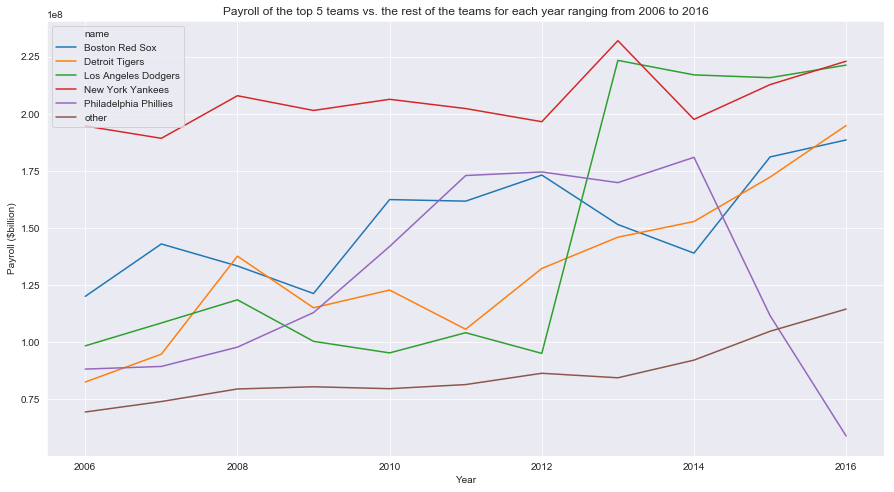

In [593]:
y = sns.lineplot(x = "yearID", y = "payroll", hue = "name", data = others_vs_top)
y.set(title = "Payroll of the top 5 teams vs. the rest of the teams for each year ranging from 2006 to 2016", xlabel = "Year", 
      ylabel = "Payroll ($billion)")

###### Trends among the top 5 teams and the rest of the teams
In comparison to the top 5 teams, it is seen that generally, all the other teams have a significantly lower payroll 
than the top 5 teams. But it follows the same trend as most of the top 5 teams in a sense beacuse the payroll of all the other 
teams on average increased between 2006 and 2016. 

__Exercise 1.2.__ Ask and use the database to answer 3 questions about baseball. For each question, write at least 2-3 paragraphs (~150 words) and support your answer with plots. If you feel like you don't have enough to write for a question, you probably aren't investigating follow up questions (inspired your original question) as carefully as you should.

__Try to come up with your own questions__, but here are two examples of reasonable questions:

* Is it common for players to switch teams? Has this changed over time? Which players have been on the most teams, and how many were they on?
* How much have salaries increased over the years in [real dollars](https://en.wikipedia.org/wiki/Real_versus_nominal_value_(economics))? The `salary` column in the `Salaries` table is in nominal dollars, so you will need to get Consumer Price Index data online if you want to answer this question. Is there a corresponding increase in performance?

Please make sure to clearly state each of your questions in your submission.

### 1.2.1 Is there a relationship among, the awards a player gets and the votes they get towards the hall of fame? Are all awards as significant as others? Which awards are the most significant?

[Text(0.5, 1.0, 'Boxplots comparing the number of awards a player has and how many votes for hall of fame they get')]

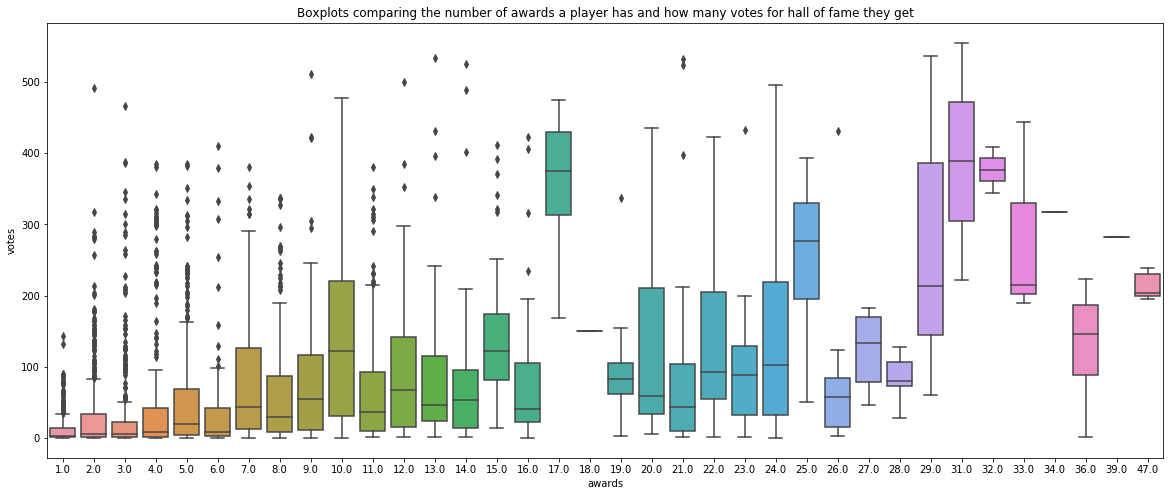

In [441]:
# Get data on the total number of awards a person has won and combine that data with how many votes that person got
# Then get average amount of votes, based of the number of awards a player recieves and then graph the data. 

hof = pd.read_sql("""
            
            SELECT t.*, s.awards FROM
            HallofFame as t
            LEFT JOIN 
            (SELECT playerID, COUNT(awardID) as awards FROM AwardsPlayers GROUP BY playerID) as s
            ON s.playerID = t.playerID
            
            """,baseball)

plt.rcParams["figure.figsize"] = [20, 8]
ax = sns.boxplot(x = "awards", y="votes", data = hof)
ax.set(title = "Boxplots comparing the number of awards a player has and how many votes for hall of fame they get")

In [502]:
# Get the frequency of each award

pd.read_sql("SELECT awardID, COUNT(*) as times_given FROM AwardsPlayers GROUP BY awardID ORDER BY times_given ",baseball)


,awardID,times_given
0,Outstanding DH Award,2
1,Reliever of the Year Award,8
2,Triple Crown,17
3,TSN Reliever of the Year,22
4,Branch Rickey Award,23
5,Comeback Player of the Year,26
6,TSN Guide MVP,33
7,ALCS MVP,37
8,Hank Aaron Award,38
9,Pitching Triple Crown,38


###### Analysis

I was curious in seeing if the number of awards a player wins has an impact on how many votes they get to be inducted into the hall of fame. My hypothesis was that as the more awards a player has the more votes they will have. Looking at the graph it is obvious that my hypothesis is false  as the number of votes does not always increase with the increase in the number of awards. 

One thing I noticed from the box plots is that as the number of awards increases the variability in votes increases as well, Furthermore, that means that though a person may have a high amount of awards they will not necessarily have a higher amount of votes in comparison to a person with a low amount of awards which disproves my hypothesis. This leads me to conclude that all awards, do not have the same level of significance because of the variability in the box plots. This means that a person may have a higher amount of awards, but a low amount of votes because they may have a lot of awards that are not that significant to determine if one should be inducted into the hall of fame or not. 

Finally, looking at which awards may be more siginifcant than others, i would say for the most part from the table that the lower the amount of times an award has been given out the more significant it is, but one should keep in mind following that list exactly won't be 100% true as some old awards may have been discontinued and other awards may have just recently started like the reliever of the year award started in 2014. Next, looking into the outstanding dh award too, i believe it is only 2 because it commonly reffered to as the edward martinez award now which was not included in the data. 

### 1.2.2 Which colleges produce the wealthiest and most Hall of Fame players. Is there a correspondence (or relationship) between salary and hall of fame appearance?

[Text(0, 0.5, 'Average earning per year for MLB players ($millions)'),
 Text(0.5, 0, 'College name'),
 Text(0.5, 1.0, 'Top 5 colleges that on average create the wealthiest MLB players')]

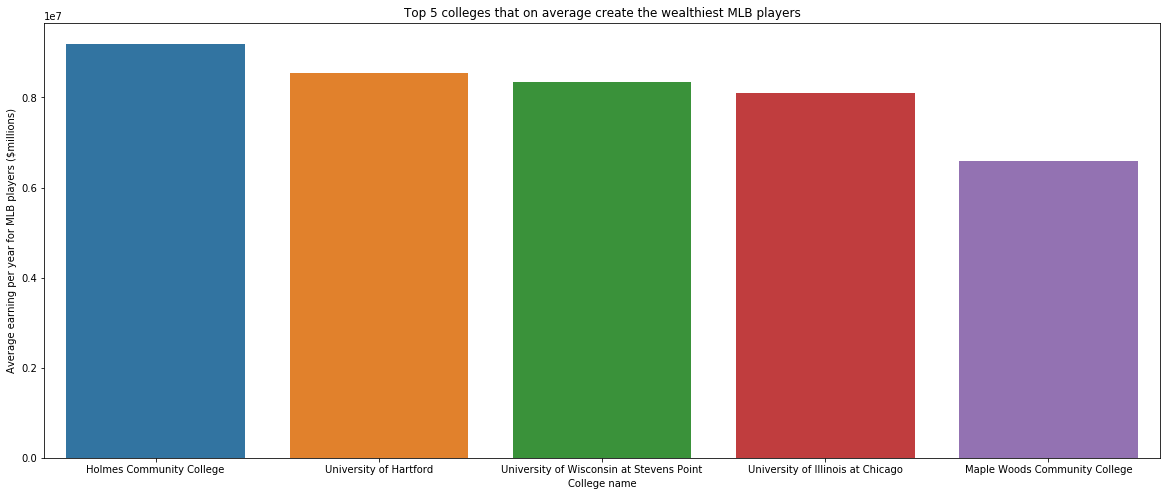

In [514]:
# Get the avaerage salaries per player id and then combine that data with which college they attended, also merged
# the data with the Schools table to get the name of each college. Then look at the top 5 schools that produced players
# with the highest salary on average, 

my_df = pd.read_sql("""
     SELECT name_full, avg(avg) as avg_col_sal FROM
     (SELECT r.*, p.name_full FROM
     Schools as p
     INNER JOIN
     (SELECT t.*, s.avg FROM
     CollegePlaying AS t
     INNER JOIN
     (SELECT playerID,avg(salary) as avg FROM Salaries GROUP BY playerID) as s
     ON s.playerID = t.playerID) as r
     ON r.schoolID = p.schoolID)
     GROUP BY name_full ORDER by avg_col_sal DESC
     LIMIT 5;
""", baseball)
plt.rcParams["figure.figsize"] = [20, 8]
college_salary = sns.barplot(x = "name_full", y = "avg_col_sal", data = my_df )
college_salary.set(title = "Top 5 colleges that on average create the wealthiest MLB players", xlabel = "College name",
                  ylabel = "Average earning per year for MLB players ($millions)")


[Text(0, 0.5, 'Number of hall of famers'),
 Text(0.5, 0, 'College name'),
 Text(0.5, 1.0, 'Colleges that produced the most hall of famers')]

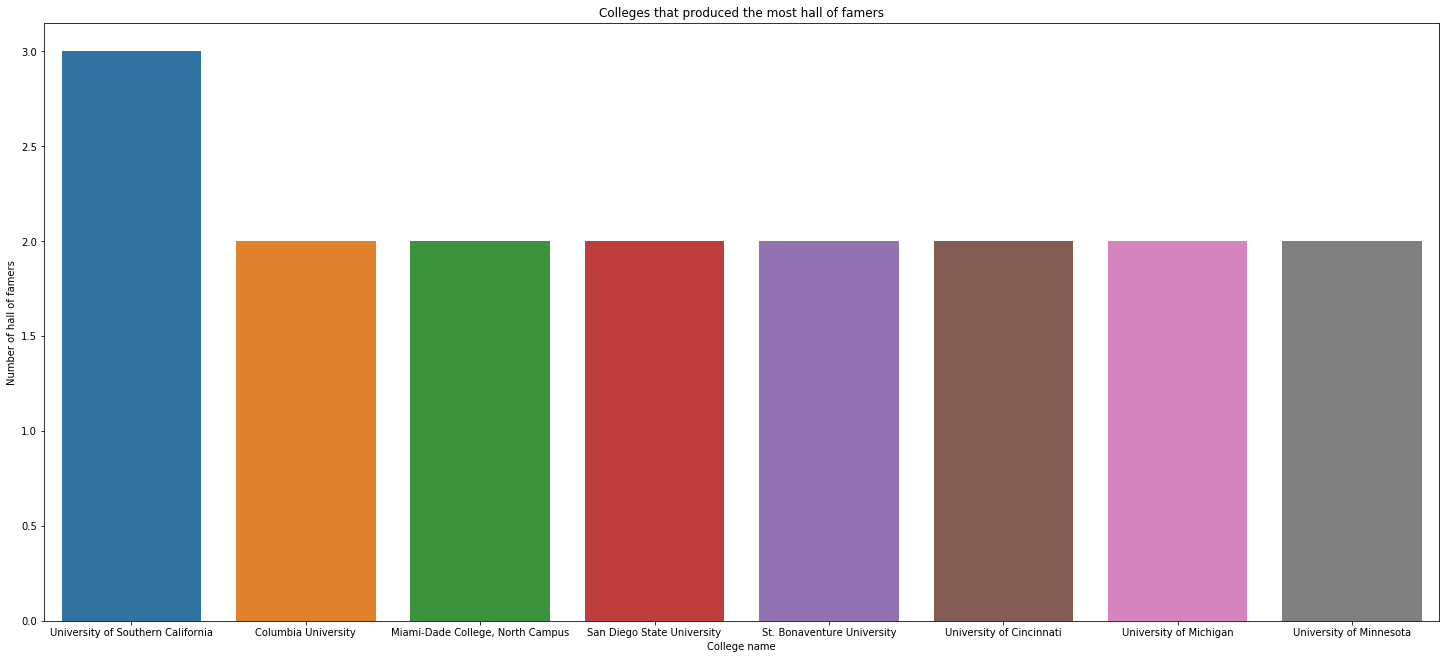

In [517]:
# Get how many hall of famers a college has produced, to do this I first combined data from halloffame table to 
# the college olaying table and then merged that with names column from the schools table to get the name of the schools.

my_df_hof = pd.read_sql("""
     SELECT name_full, COUNT (DISTINCT playerID) as num_of_hof FROM
     (SELECT r.*, p.name_full FROM
     Schools as p
     INNER JOIN
     (SELECT t.*, s.inducted FROM
     CollegePlaying AS t
     INNER JOIN
     (SELECT * FROM HallofFame WHERE inducted = 'Y') as s
     ON s.playerID = t.playerID) as r
     ON r.schoolID = p.schoolID)
     GROUP BY name_full ORDER by num_of_hof DESC
""", baseball)

# After looking at the data, i decided to plot the colleges that produced more than one hof. 
my_df2 = my_df_hof[0:8]
college_hof = sns.barplot(x = "name_full", y = "num_of_hof", data = my_df2 )
plt.rcParams["figure.figsize"] = [25, 11]
college_hof.set(title = "Colleges that produced the most hall of famers", xlabel = "College name",
                  ylabel = "Number of hall of famers")



In [518]:
# Check to see how many hall of famers were produced by the top colleges with highest avaerage salaries seen above. 

my_df_hof[my_df_hof['name_full'].str.contains('University of Hartford|Holmes Community College|University of Wisconsin at Stevens PointCollege|University of Illinois at Chicago|Maple Woods Community College')]


,name_full,num_of_hof
55,University of Hartford,1


##### Analysis

When thinking about this question, I wanted to see which colleges help produce the most successful MLB players. Success can be measured in two ways: wealth and by their personal achievements. First looking at salaries it is seen that Holmes Community College, University of Hartford, University of Wisconsin Stevens Point, the University of Illinois at Chicago and Maple Woods Community College. Before researching this question I expected a lot of big names colleges to be on this list, so I was extremely surprised that not only that those big colleges were not there, but also some community colleges made it onto the list.

Next, looking at personal achievements, I defined personal achievements, by whether or not a player made the hall of fame as from section 1.2.1 I found that awards have different weights, so a person is likely to get inducted if they win the most significant ones.The colleges that produced the most amount of hall of famers are shown in the figure above. Looking at the top colleges which produced the most amount of hall of Famers, I noticed this result was my expectation as there are some big - name or popular colleges that are out there today.

In conclusion, I was also able to see that there is probably no relation and correspondence among salary and hall of fame appearances as out of all the top 5 colleges that produced the wealthiest MLB players, only one of those colleges had a player who went on to be a hall of Famer and that was from Hartford University. 

### 1.2.3 Are there any trends in battings from 2006 to 2016? Do those trends apply to battings in the post season as well? 

[Text(0.5, 1.0, 'Total amount of hits, homeruns, and strikeouts per year in the regular seaon from 2006 to 2018')]

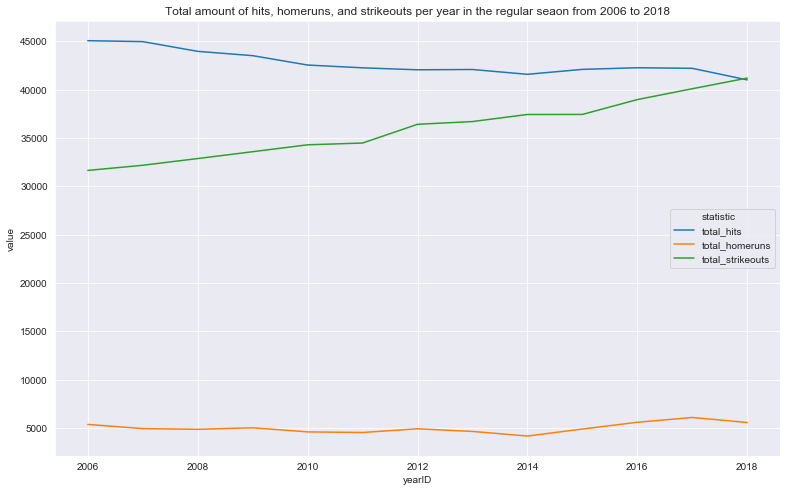

In [584]:
# Get the total amount of hits, homeruns, and strikeouts per year in the regular season for the years 2006-2018
# and then graph it

batting_df = pd.read_sql(""" 
    SELECT yearID,sum(H) as total_hits, SUM(HR) as total_homeruns, 
    SUM(SO) as total_strikeouts FROM Batting
    GROUP BY yearID HAVING yearID BETWEEN 2006 AND 2018
""",baseball)

# Melt the data frame so i can hue my graph
new_df = pd.melt(batting_df, id_vars = "yearID", var_name = "statistic", value_name = "value")

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [13, 8]
batting_plt = sns.lineplot(x = "yearID", y = "value", hue = "statistic", data = new_df)
batting_plt.set(title = "Total amount of hits, homeruns, and strikeouts per year in the regular seaon from 2006 to 2018")



[Text(0.5, 1.0, 'Total amount of hits, homeruns, and strikeouts per year in the post seaon from 2006 to 2018')]

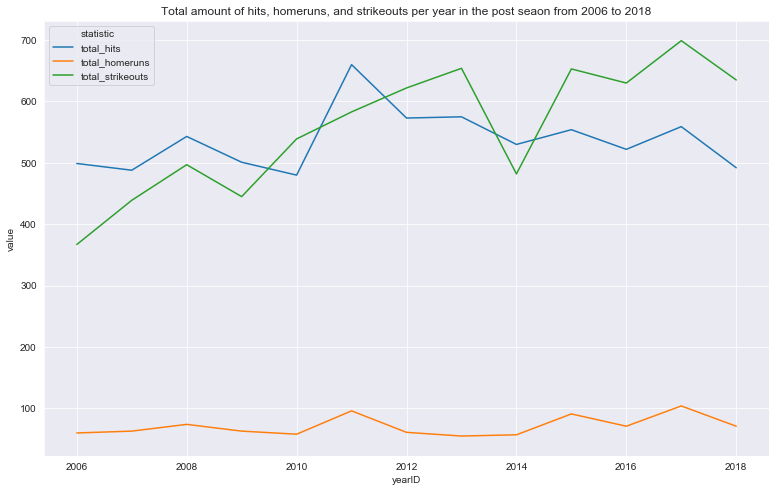

In [585]:
# Get the total amount of hits, homeruns, and strikeouts per year in the regular season for the years 2006-2018
# and then graph it

batting_post_df = pd.read_sql(""" 
            SELECT yearID,SUM(H) as total_hits, SUM(HR) as total_homeruns, 
            SUM(SO) as total_strikeouts
            FROM BattingPost
            GROUP BY yearID HAVING yearID BETWEEN 2006 AND 2018
""",baseball)

# Melt the data frame so i can hue my graph
new_df2 = pd.melt(batting_post_df, id_vars = "yearID", var_name = "statistic", value_name = "value")

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [13, 8]
batting_plt2 = sns.lineplot(x = "yearID", y = "value", hue = "statistic", data = new_df2)
batting_plt2.set(title = "Total amount of hits, homeruns, and strikeouts per year in the post seaon from 2006 to 2018")


##### Analysis

First lets look at the trends in batting in the regular season from 2006 to 2018. It is seen that overall there is a slight increase in the amount of home runs between 2006 and 2018, but overall home run seems to have a minimal amount of fluctuation throughout the years. On the other, hand looking at total hits and strikeouts, one can clearly see that there is a correlation among the two. Throughout the years, the amount of hits decreases which then causes the number of strikeouts to increase overall. I conclude then that hits and strikeouts have an inverse relationship. Finally, looking the contrast among 2006 and 2018 one can say in 2018 players tend to hit the ball harder than they did in 2006 as there is more home runs, but they do not hit as efficiently as players did in 2006 as the number of strikeouts increases and number of hits decreases.

Next, looking in the post-season the first thing I want to point out is that values are lower than the values for the regular season due to the fact that there are more regular season games than playoff games. Each category, for postseason games, fluctuates more than categories did for regular season games. Looking at the number of hits from 2006 to 2018 there is a lot of fluctuation in between but in 2018 the number of hits returns to the same amount it was in 2018. This is the same pattern for the number of home runs as well so therefore I will conclude that there is a positive relationship among the number of hits and home runs as one increases or decreases the other follows the same. Unlike for regular season, there is not really a strong relationship among the total number of hits and amount of strikeouts as there was in the regular season. But in comparison with 2006 and 2018, the amount of strikeouts follows the same pattern as strikeouts in the regular season as in 2018 there are more strike outs. Finally, in the postseason there is a lot of overlap among the total amount of hits and strikeouts, one thing i conclude is that in years such as 2018, 2016 and more, the batters may be losing the battle to the pitchers as there are more strikeouts than hits in those years, but due to other factors of baseball I cannot be 100% positive that's the case.


In [10]:
# Close connection
baseball.close()